# Finding Best Model For Tabular Data (Ames Housing Dataset) Linear vs Ridge vs Lasso vs RandomForest

## Hiii 

Step 1: Import Libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Step 2: Load the Dataset

In [43]:
from sklearn.datasets import fetch_openml

# Fetch from OpenML
housing = fetch_openml(name="house_prices", as_frame=True)

# Convert to pandas DataFrame
df = housing.frame  

# Now df is a pandas DataFrame
print(df.shape)
print(df.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

Step 3: Prepare the Data

In [44]:
data = data.dropna(subset=["SalePrice"])

In [45]:
# Select numerical features only (quick baseline)
X = data.select_dtypes(include=[np.number]).drop(columns=["SalePrice"])
y = data["SalePrice"]

# Handle NaN values (replace with median)
X = X.fillna(X.median())

Step 4: Split the Data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 5: Train the Model

In [47]:
# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}
results = {}

Step 6: Make Predictions

Step 7: Evaluate the Model

In [50]:
for name, model in models.items():
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    #Scores
    print(f"\n{name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")



Linear Regression
RMSE: 36879.82
R2 Score: 0.8227

Ridge Regression
RMSE: 36878.88
R2 Score: 0.8227

Lasso Regression
RMSE: 36879.82
R2 Score: 0.8227

Random Forest
RMSE: 29225.38
R2 Score: 0.8886


In [51]:
# Compare results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                           RMSE        R2
Linear Regression  36879.819322  0.822678
Ridge Regression   36878.876176  0.822687
Lasso Regression   36879.818991  0.822678
Random Forest      29225.377308  0.888646


Step 8: Visualize the Results

In [54]:
# Scatter plot for the best model (Random Forest usually wins)
best_model_name = results_df["R2"].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

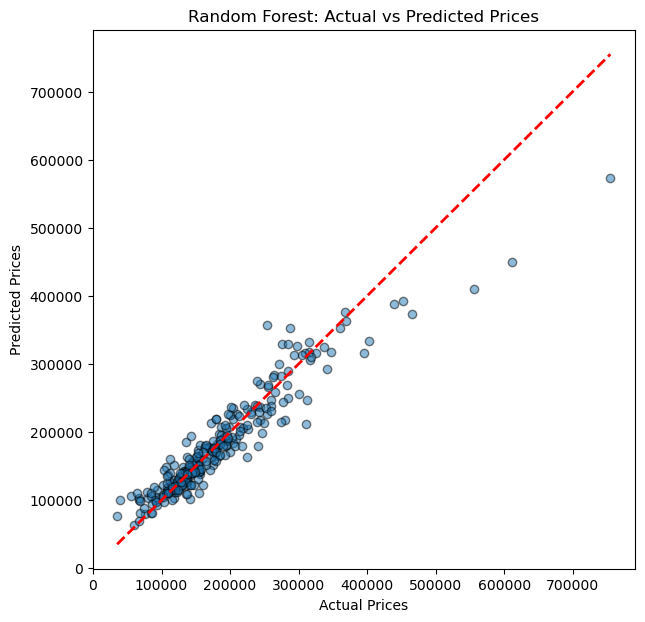

In [53]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_best, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"{best_model_name}: Actual vs Predicted Prices")
plt.show()

### Byee !!!